<img src="kschool.png" width="120" height="120" align="right"/>

# Market Basket Analysis

<div class  = "alert alert-info">

Es un método que permite descubrir asociaciones entre productos basadas en el historial de compras de los clientes. Es una técnica empleada en la industria de retailing y e-commerce.

</div>

<div class  = "alert alert-info">

**Destacamos**:

- A diferencia del método anterior, que es más geométrico, éste es un método basado en estadísticas.
- Las estadísticas se construyen con histórico y serán más robustas cuanto mayor sea el dataset.
- A diferencia del método anterior, no incluye información del comprador.
    
</div>

### Reglas de asociación:

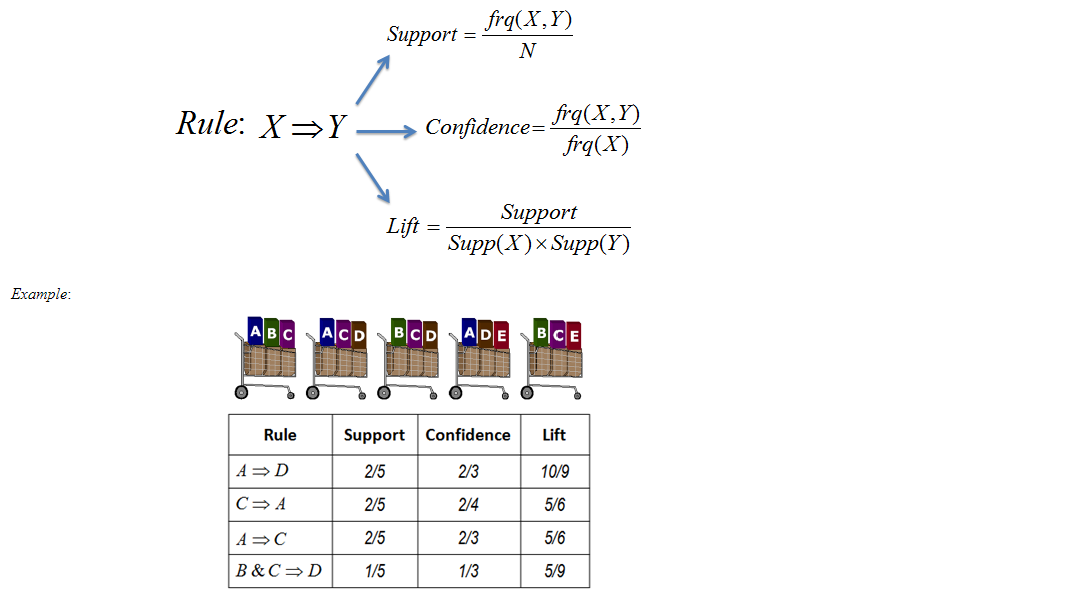

### Ejemplo:

https://es.wikipedia.org/wiki/Reglas_de_asociaci%C3%B3n

$I=\{leche, pan, mantequilla, cerveza\}$ es el listado de items.

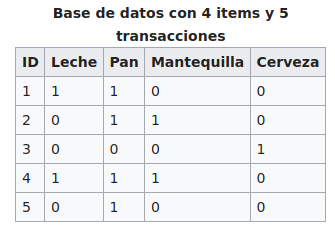

*Ejemplo de regla*:
$$\{leche, pan\} \Rightarrow \{mantequilla\}$$

donde $X=\{leche, pan\}$ e $Y=\{mantequilla\}$

##### 1. Soporte, $supp(X)$:

El **soporte** de un conjunto de items $X$ en una base de datos $D$ se define como la proporción de transacciones en la base de datos que contiene dicho conjunto de items.

$$supp(X)=\dfrac{|X|}{|D|}$$

*Ejemplo*:
$$supp(X)=sup(\{leche, pan\})=\dfrac{2}{5}=0.4$$
Es decir, el soporte es del 40% (2 de cada 5 transacciones)

**2. Confianza**, $conf(X  \Rightarrow Y)$:

La **confianza** en una regla nos indica hasta qué punto es cierta dicha regla. También se podría interpretar como la probabilidad de encontrar $Y$ sabiendo que se tiene $X$.

$$conf(X  \Rightarrow Y) = \dfrac{supp(X \cup Y)}{supp(X)}=\dfrac{|X \cup Y|}{|X|}$$

*Ejemplo:*
$$conf(X \Rightarrow Y) = \dfrac{|\{leche,pan,mantequilla\}|}{|\{leche,pan\}|}=\dfrac{1}{2}=0.5$$

Es decir, la regla es cierta en el 50% de los casos.

**3. Mejora de confianza**, $lift(X,Y)$:

El indicador **lift** expresa cuál es la proporción del soporte observado de un conjunto de productos respecto del soporte teórico de ese conjunto dado el supuesto de independencia. 

$$lift(X \Rightarrow Y) = \dfrac{supp(X \cup Y)}{supp(X) \cdot supp(Y)}$$

- Un valor de *lift = 1* indica que ese conjunto aparece una cantidad de veces acorde a lo esperado bajo condiciones de independencia. 

- Un valor de *lift > 1* indica que ese conjunto aparece una cantidad de veces superior a lo esperado bajo condiciones de independencia (por lo que se puede intuir que existe una relación que hace que los productos se encuentren en el conjunto más veces de lo normal). 

- Un valor de *lift < 1* indica que ese conjunto aparece una cantidad de veces inferior a lo esperado bajo condiciones de independencia (por lo que se puede intuir que existe una relación que hace que los productos no estén formando parte del mismo conjunto más veces de lo normal). 

*Ejemplo*:
$$lift(X \Rightarrow Y) = \dfrac{supp(\{leche,pan,mantequilla\})}{supp(\{leche,pan\}) \cdot supp(\{mantequilla\})}=\dfrac{0.2}{0.4 \cdot 0.4}=1.25$$

### Práctica:

##### Dataset

In [25]:
import pandas as pd

df = pd.read_excel('http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx')
df = df[df['Country'] =="France"] # Nos quedamos con un pais, pero es interesante hacer una investigación comparando con otros paises
df = df.dropna()
df = df[['InvoiceNo','Description','Quantity']]

print(len(df))
df.head(5)

8491


,InvoiceNo,Description,Quantity
26,536370,ALARM CLOCK BAKELIKE PINK,24
27,536370,ALARM CLOCK BAKELIKE RED,24
28,536370,ALARM CLOCK BAKELIKE GREEN,12
29,536370,PANDA AND BUNNIES STICKER SHEET,12
30,536370,STARS GIFT TAPE,24


In [26]:
# Numero de items 

df.Description.nunique()

1545

##### Matrix of purchases

In [22]:
# df['Description'] = df['Description'].str.strip()
# df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)

# df['InvoiceNo'] = df['InvoiceNo'].astype('str')
# df = df[~df['InvoiceNo'].str.contains('C')]

In [28]:
basket = df.groupby(['InvoiceNo', 'Description'])['Quantity'].sum()
basket.head()

InvoiceNo  Description                     
536370      SET 2 TEA TOWELS I LOVE LONDON     24
           ALARM CLOCK BAKELIKE GREEN          12
           ALARM CLOCK BAKELIKE PINK           24
           ALARM CLOCK BAKELIKE RED            24
           CHARLOTTE BAG DOLLY GIRL DESIGN     20
Name: Quantity, dtype: int64

In [29]:
basket = basket.unstack().reset_index().fillna(0).set_index('InvoiceNo')
basket.head()

Description,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TRELLIS COAT RACK,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,...,WRAP SUKI AND FRIENDS,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# No nos interesan las cantidades, así que transformamos a booleano todo

def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)
basket_sets.drop('POSTAGE', inplace=True, axis=1)
basket_sets.head()

Description,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TRELLIS COAT RACK,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,...,WRAP SUKI AND FRIENDS,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
# !pip install mlxtend

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

##### Basket-analysis

In [32]:
# generamos una lista de items frecuentes. Le ponemos un umbral para despreciar aquellos productos
# que se compran conjuntamente con demasiada poca frecuencia.

frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.082969,(ALARM CLOCK BAKELIKE GREEN)
1,0.087336,(ALARM CLOCK BAKELIKE PINK)
2,0.080786,(ALARM CLOCK BAKELIKE RED )
3,0.085153,(DOLLY GIRL LUNCH BOX)
4,0.082969,(JUMBO BAG RED RETROSPOT)
5,0.106987,(LUNCH BAG APPLE DESIGN)
6,0.072052,(LUNCH BAG DOLLY GIRL DESIGN)
7,0.131004,(LUNCH BAG RED RETROSPOT)
8,0.102620,(LUNCH BAG SPACEBOY DESIGN )
9,0.100437,(LUNCH BAG WOODLAND)


In [33]:
# Hacemos un análisis de las posibles reglas de asociación

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN CIRCUS PARADE ),0.115721,0.144105,0.076419,0.660377,4.582619,0.059743,2.520136
1,(PLASTERS IN TIN CIRCUS PARADE ),(PLASTERS IN TIN SPACEBOY),0.144105,0.115721,0.076419,0.530303,4.582619,0.059743,1.882660
2,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN CIRCUS PARADE ),0.146288,0.144105,0.087336,0.597015,4.142922,0.066255,2.123888
3,(PLASTERS IN TIN CIRCUS PARADE ),(PLASTERS IN TIN WOODLAND ANIMALS),0.144105,0.146288,0.087336,0.606061,4.142922,0.066255,2.167115
4,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN WOODLAND ANIMALS),0.115721,0.146288,0.089520,0.773585,5.288088,0.072591,3.770560


##### Entender el contenido

In [10]:
# lift > 6: ocurre con más frecuencia de lo esperado dada la cantidad de transacciones y combinaciones de productos 
# confidence > 0.8: reglas fiables de asociación. 

rules[ (rules['lift'] >= 6) & (rules['confidence'] >= 0.8) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,0.069932,4.916181
3,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,0.069932,5.568878
16,(SET/6 RED SPOTTY PAPER PLATES),(SET/20 RED RETROSPOT PAPER NAPKINS),0.127551,0.132653,0.102041,0.800000,6.030769,0.085121,4.336735
18,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.127551,0.137755,0.122449,0.960000,6.968889,0.104878,21.556122
19,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.137755,0.127551,0.122449,0.888889,6.968889,0.104878,7.852041
20,"(SET/6 RED SPOTTY PAPER PLATES, SET/6 RED SPOT...",(SET/20 RED RETROSPOT PAPER NAPKINS),0.122449,0.132653,0.099490,0.812500,6.125000,0.083247,4.625850
21,"(SET/6 RED SPOTTY PAPER PLATES, SET/20 RED RET...",(SET/6 RED SPOTTY PAPER CUPS),0.102041,0.137755,0.099490,0.975000,7.077778,0.085433,34.489796
22,"(SET/6 RED SPOTTY PAPER CUPS, SET/20 RED RETRO...",(SET/6 RED SPOTTY PAPER PLATES),0.102041,0.127551,0.099490,0.975000,7.644000,0.086474,34.897959


### Ejercicio:

<div class  = "alert alert-success">

- Realizar el mismo trabajo y análisis con Germany. Comparar los estilos de compra.
    
</div>

### Ejercicio:

<div class  = "alert alert-success">

- Cargad los artículos y filtrar solo los que tengan like.
- Realizar un estudio de cuáles son los artículos que suelen ir acompañados en la compra.
    
</div>